<a href="https://colab.research.google.com/github/gopika20nair/Solubility-Prediction-of-drug-compounds-ML-Demo/blob/main/DEc(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rdkit pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 13.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AquaSol_RDKit_Descriptors.csv to AquaSol_RDKit_Descriptors.csv


In [ ]:
data = pd.read_csv("AquaSol_RDKit_Descriptors.csv")

In [ ]:
print(data.head())

       BalabanJ     BertzCT       Chi0      Chi0n      Chi0v       Chi1  \
0  0.000000e+00   210.37733  16.520815  16.845993  18.431990  10.560660   
1  2.582996e+00   511.22925   8.836499   6.872350   6.872350   6.360173   
2  3.009782e+00   202.66107   6.690235   4.672964   5.428893   4.325698   
3  2.322963e-07  1964.64870  37.362870  30.400335  33.367462  24.972141   
4  1.084427e+00   769.89996  20.622746  17.819584  17.819584  15.281122   

       Chi1n      Chi1v      Chi2n      Chi2v  ...  fr_sulfone  \
0  10.364975  10.364975   8.317232   8.317232  ...         0.0   
1   4.192158   4.192158   3.163383   3.163383  ...         0.0   
2   2.534727   2.912691   1.669402   2.105838  ...         0.0   
3  17.334648  17.334648  13.116999  13.116999  ...         0.0   
4  11.425462  11.425462   9.141005   9.141005  ...         0.0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                0.0           0.0          0.0          0.0           0.0

In [ ]:
X = data.iloc[:, :-1]
y = data['Solubility']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeRegressor(random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')



Mean Squared Error: 2.06048113449318
Root Mean Squared Error: 1.4354376107978988
Mean Absolute Error: 0.9417189069456351
R² Score: 0.6201629741719421


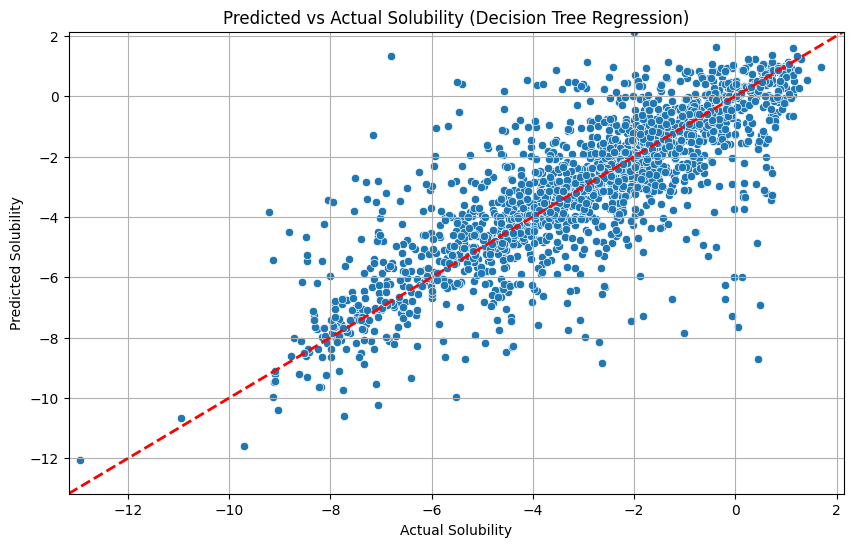

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title('Predicted vs Actual Solubility (Decision Tree Regression)')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.grid()
plt.show()